# Cluster-FCI vs FCITiers on tiered background knowledge

This notebook shows how to simulate a MAG using the clustercausal.clustercausal.Simulator class, getting a C-DAG and/or tiered background knowledge compatible with the MAG and then running the Cluster-FCI and FCITiers algorithms on the generated data. The results are then compared. 

In [515]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="tqdm")

import logging
logging.getLogger('rpy2').setLevel(logging.WARNING)

#importing libraries and dependencies
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from causallearn.search.ConstraintBased.PC import pc
from clustercausal.experiments.Simulator import Simulator
from clustercausal.experiments.Evaluator import Evaluator
from clustercausal.algorithms.ClusterPC import ClusterPC as ClusterPC
from clustercausal.clusterdag.ClusterDAG import ClusterDAG
from clustercausal.utils.Utils import *
from clustercausal.algorithms.FCITiers import fci_tiers

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [538]:
seed = None
num_edges = []
for i in range(50):
    simulation = Simulator(n_nodes = 20, n_edges = 20, cluster_method = 'cdag', n_clusters = 4, n_c_edges = 5, seed = seed)
    cluster_dag = simulation.run_with_tbk()
    no_edges_true_dag = len(cluster_dag.true_dag.G.get_graph_edges())
    num_edges.append(no_edges_true_dag)


2025-04-28 18:32:06,481 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:06,597 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-04-28 18:32:06,796 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:07,001 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-04-28 18:32:07,096 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:07,213 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-04-28 18:32:07,362 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:07,514 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-04-28 18:32:07,562 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:07,746 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-04-28 18:32:07,863 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:08,135 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:08,385 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-04-28 18:32:08,586 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:08,657 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:08,797 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:09,031 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-04-28 18:32:09,155 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:09,466 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-04-28 18:32:09,582 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-04-28 18:32:09,623 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:09,766 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:10,000 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-04-28 18:32:10,172 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:10,332 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-04-28 18:32:10,440 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-04-28 18:32:10,522 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:10,758 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-04-28 18:32:10,916 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:11,113 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:11,382 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-04-28 18:32:11,501 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:11,603 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-04-28 18:32:11,753 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:11,968 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-04-28 18:32:12,174 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:12,316 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:12,548 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-04-28 18:32:12,687 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:12,889 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-04-28 18:32:13,037 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:13,168 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-04-28 18:32:13,250 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:13,423 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-04-28 18:32:13,589 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:13,764 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:13,985 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:14,262 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset
2025-04-28 18:32:14,326 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


2025-04-28 18:32:14,606 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


(array([ 1.,  3.,  2.,  1.,  7.,  9.,  5., 14.,  4.,  4.]),
 array([17. , 18.7, 20.4, 22.1, 23.8, 25.5, 27.2, 28.9, 30.6, 32.3, 34. ]),
 <BarContainer object of 10 artists>)

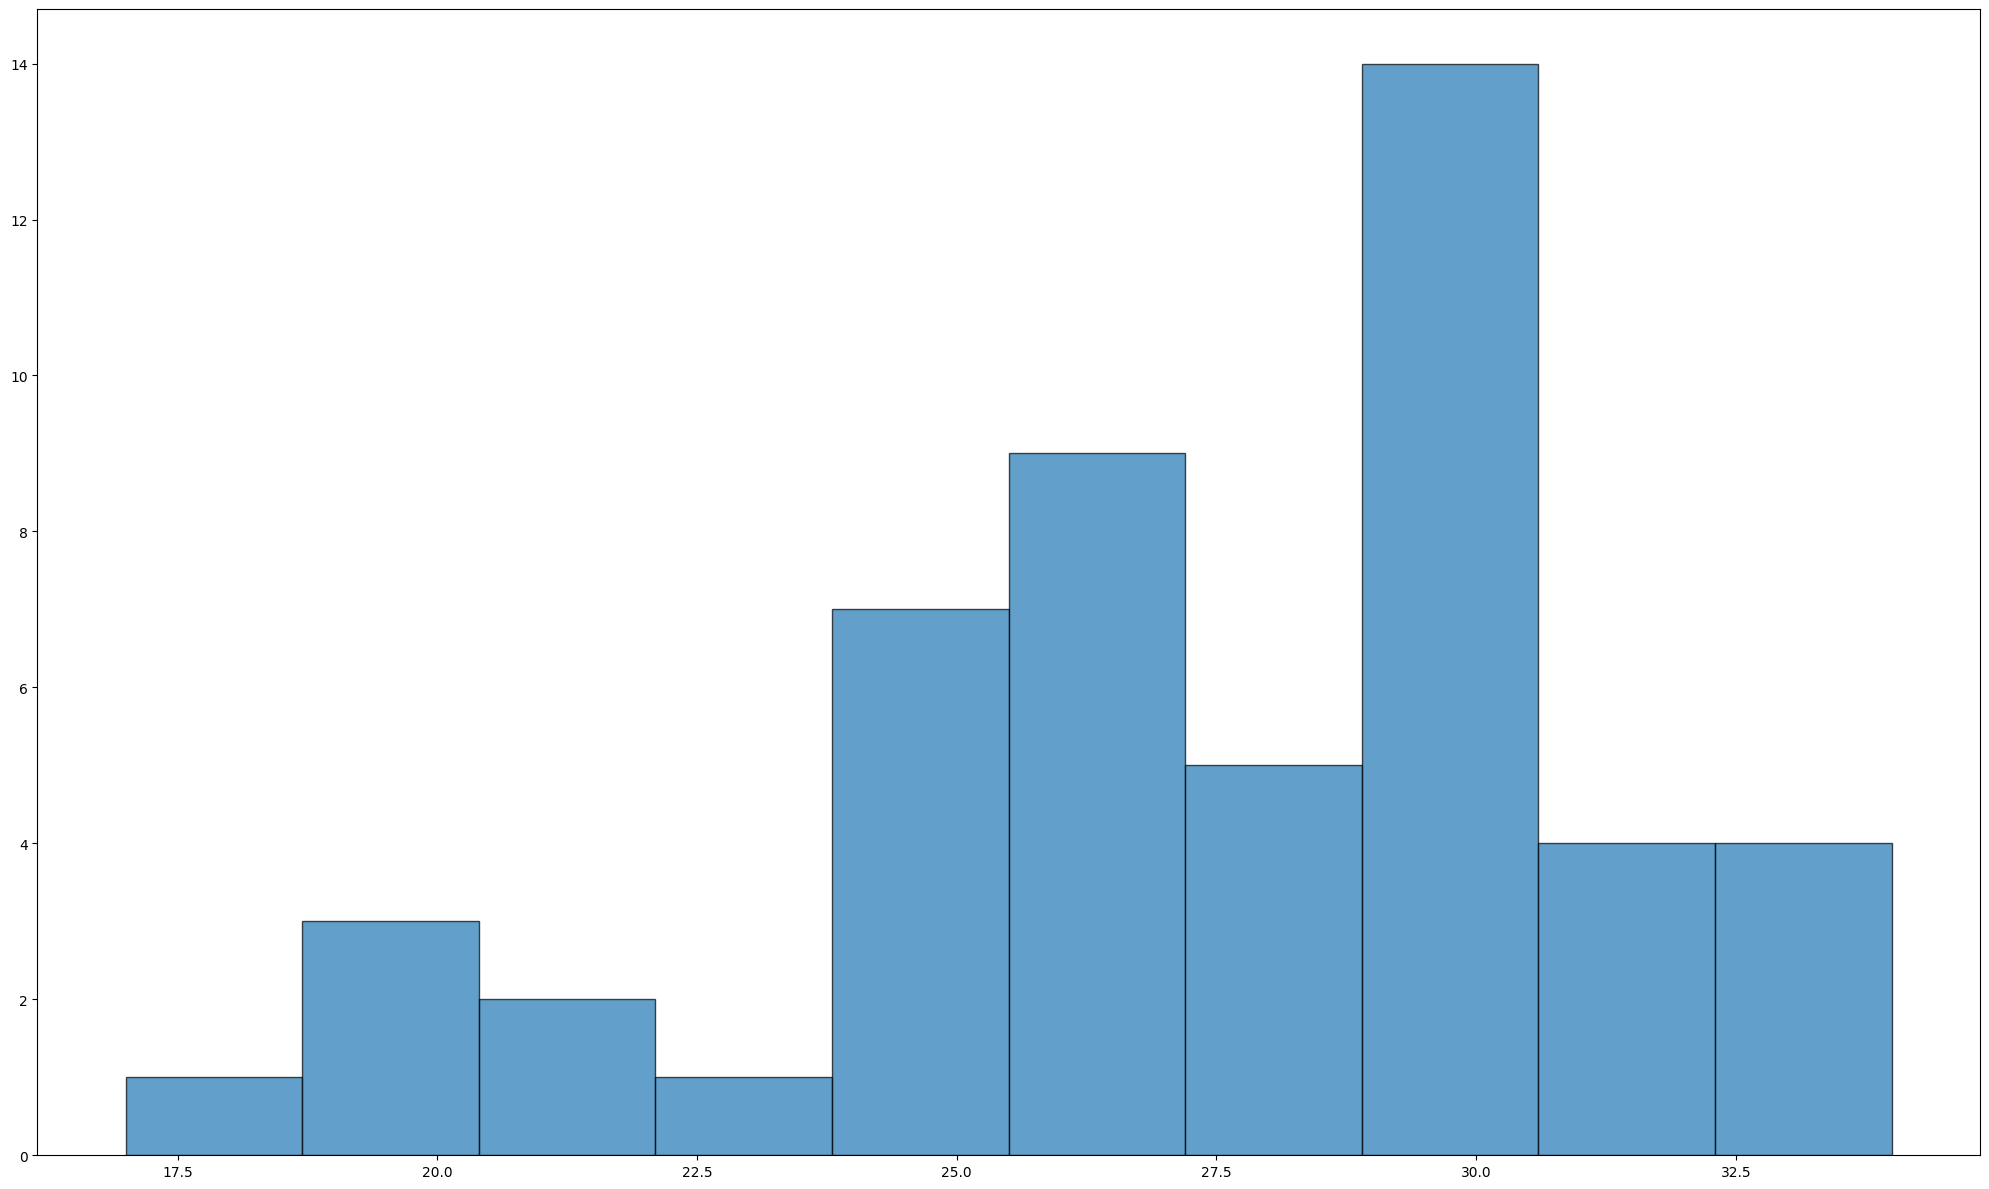

In [539]:
plt.hist(num_edges, bins=10, edgecolor='black', alpha=0.7)

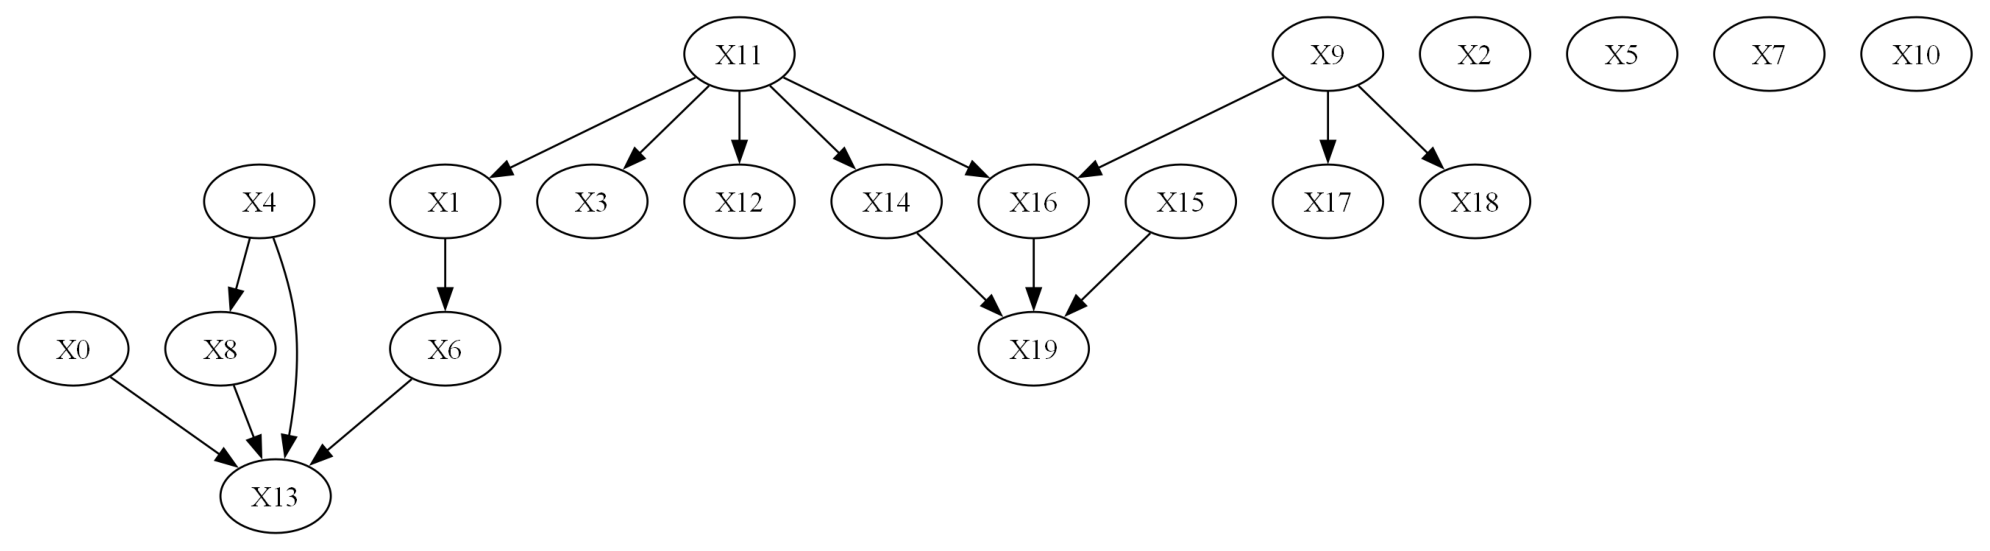

2025-04-28 18:28:43,030 - c:\Users\ga87val\00_PhD\Paper Development\ClusterDAGs_causal_discovery\clustercausal\env\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


In [526]:
# simulation = Simulator(n_nodes = 20, n_edges = 50, cluster_method = 'cdag', n_clusters = 4, seed = 232)
# seed = np.random.randint(0, 1000)
seed = 501
seed = None
# A note on n_c_edges: the number of edges is n_clusters*(n_clusters-1) * n_c_edges / n_clusters**2 in expectation, 
# as they are created probabilistically. So the number of cluster edges is only approximately controllable
simulation = Simulator(n_nodes = 20, n_edges = 20, cluster_method = 'cdag', n_clusters = 4, n_c_edges = 5, seed = seed)
# simulation = Simulator(n_nodes = 20, n_edges = 50, cluster_method = 'cdag', n_clusters = 4)
cluster_dag = simulation.run_with_tbk()

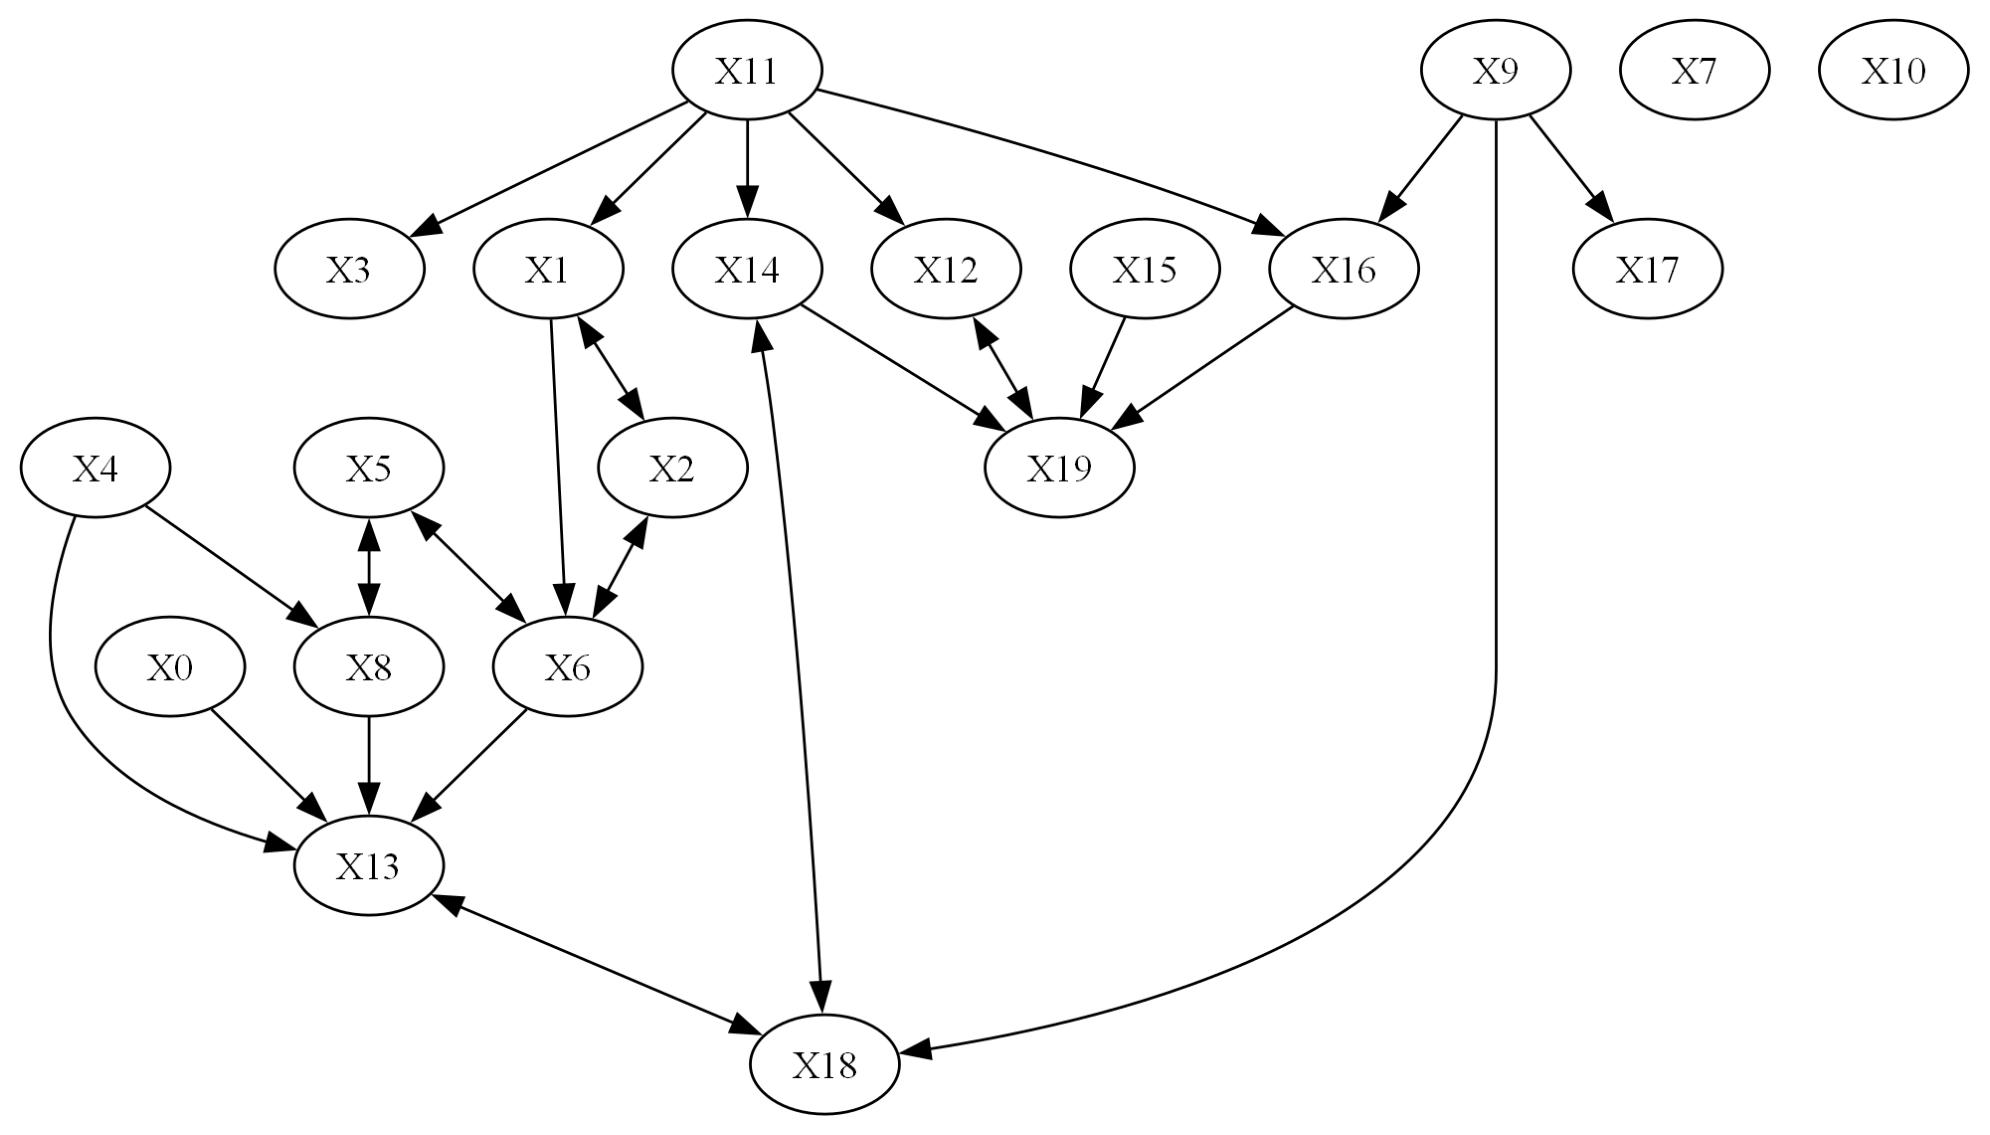

In [527]:
cluster_dag.true_dag.draw_pydot_graph()

In [528]:
no_edges_true_dag = len(cluster_dag.true_dag.G.get_graph_edges())
print(f"Number of edges in the true DAG: {no_edges_true_dag}")

Number of edges in the true DAG: 24


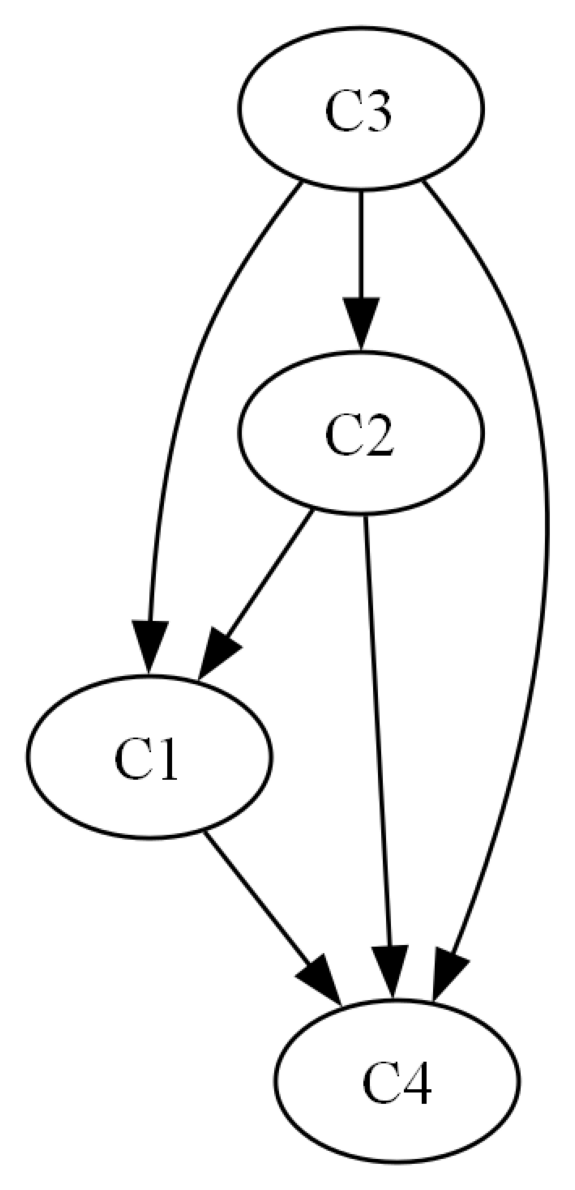

In [529]:
cluster_dag.cluster_graph.draw_pydot_graph()

In [530]:
cluster_dag.cluster_mapping

{'C1': ['X0'],
 'C2': ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9'],
 'C3': ['X10', 'X11'],
 'C4': ['X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19']}